In [3]:
import pandas as pd
df=pd.read_csv('lab4_data.csv')
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [2]:
#A1
import math
data=pd.DataFrame({'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
})
def Entropy(labels):
    entropy=0
    label_unique=pd.unique(labels)
    total=len(labels)
    for label in label_unique:
        count_label=labels.value_counts()[label]
        probability=count_label/total
        entropy-=probability*math.log2(probability)
    return entropy
labels=data['age']
res=Entropy(labels)
print("entropy of age is",res )

entropy of age is 1.5774062828523454


In [3]:
labels=data['income']
res=Entropy(labels)
print("entropy of income is",res )

entropy of income is 1.5566567074628228


In [4]:
labels=data['student']
res=Entropy(labels)
print("entropy of studentis",res )

entropy of studentis 1.0


In [5]:
labels=data['credit_rating']
res=Entropy(labels)
print("entropy is",res )

entropy is 0.9852281360342516


In [6]:
labels=data['buys_computer']
res=Entropy(labels)
print("entropy is",res )

entropy is 0.9402859586706311


In [7]:
def info_gain(data,attribute):
    system_entropy=Entropy(data['buys_computer'])
    avg_entropy=0
    unique_val=data[attribute].unique()
    for val in unique_val:
        subset=data[data[attribute]==val]
        subset_weight=len(subset)/len(data)
        avg_entropy+=subset_weight*Entropy(subset['buys_computer'])
        gain=system_entropy-avg_entropy
        return gain
attr=['age','income','student','credit_rating']
Info_gain={}
for attribute in attr:
    Info_gain[attribute]=info_gain(data,attribute)
root_attr=max(Info_gain,key=Info_gain.get)
print("information gain is ")
for attribute,gain in Info_gain.items():
    print(f"{attribute}:{gain}")
print("root node in DT is ",root_attr)

information gain is 
age:0.5935178892225352
income:0.6545716729563454
student:0.4476718906535053
credit_rating:0.4766984589796981
root node in DT is  income


In [8]:
#A2
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
x=data.drop(columns=['buys_computer'])
y=data['buys_computer']
x_encoded=pd.get_dummies(x)
DT=DecisionTreeClassifier()
DT.fit(x_encoded,y)
train_acc=DT.score(x_encoded,y)
print("accuracy of training set ",train_acc)
depth_DT=DT.get_depth()
print("depth of decision tree is ",depth_DT)

accuracy of training set  1.0
depth of decision tree is  4


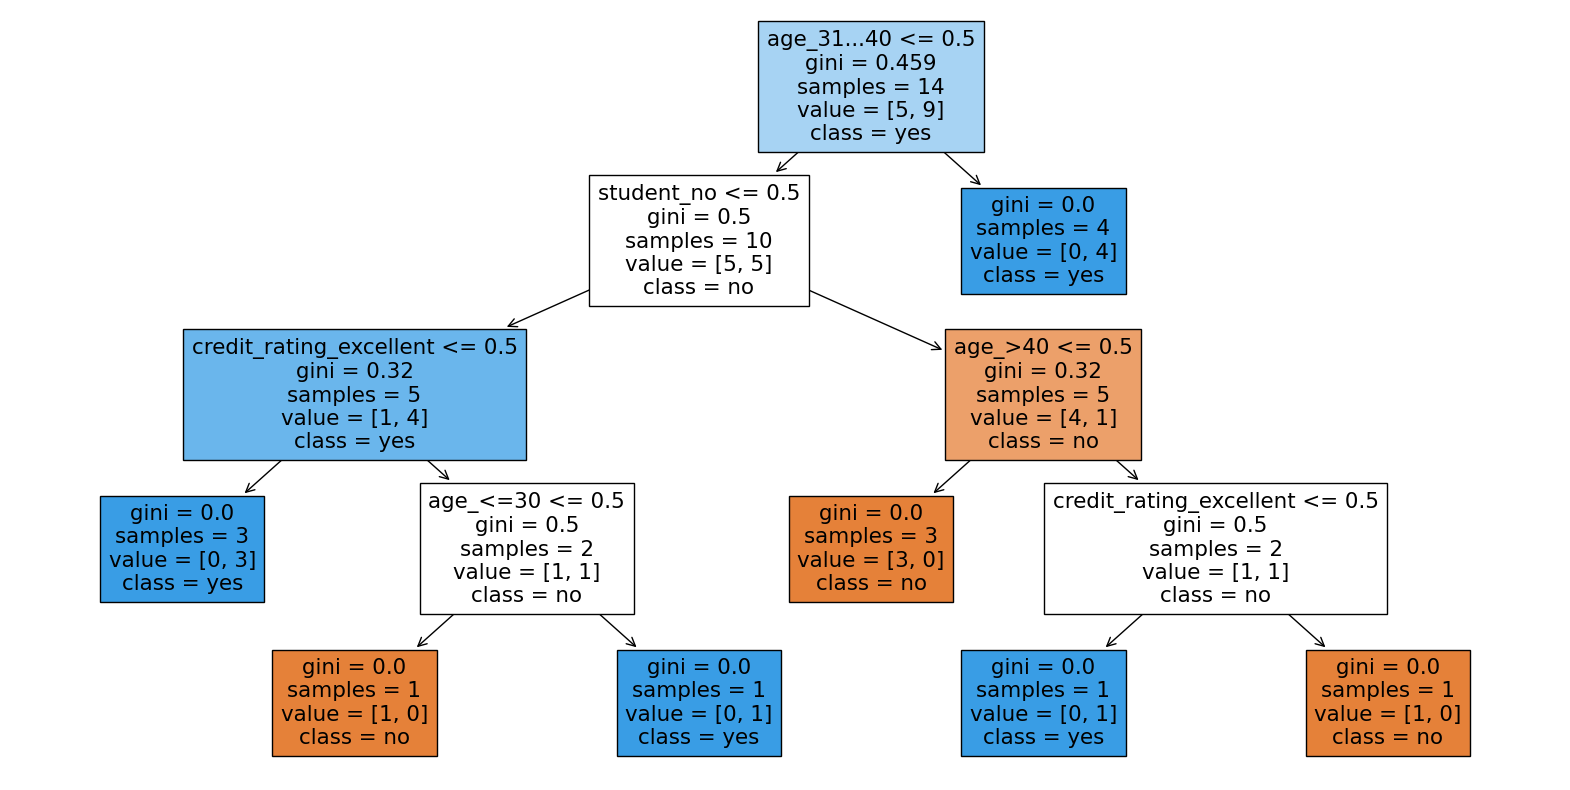

In [13]:
#A3
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(DT,filled=True,feature_names=x_encoded.columns.tolist(),class_names=DT.classes_.tolist())
plt.show()

accuracy of training set is  1.0
accuracy of test set is  0.9392628205128205


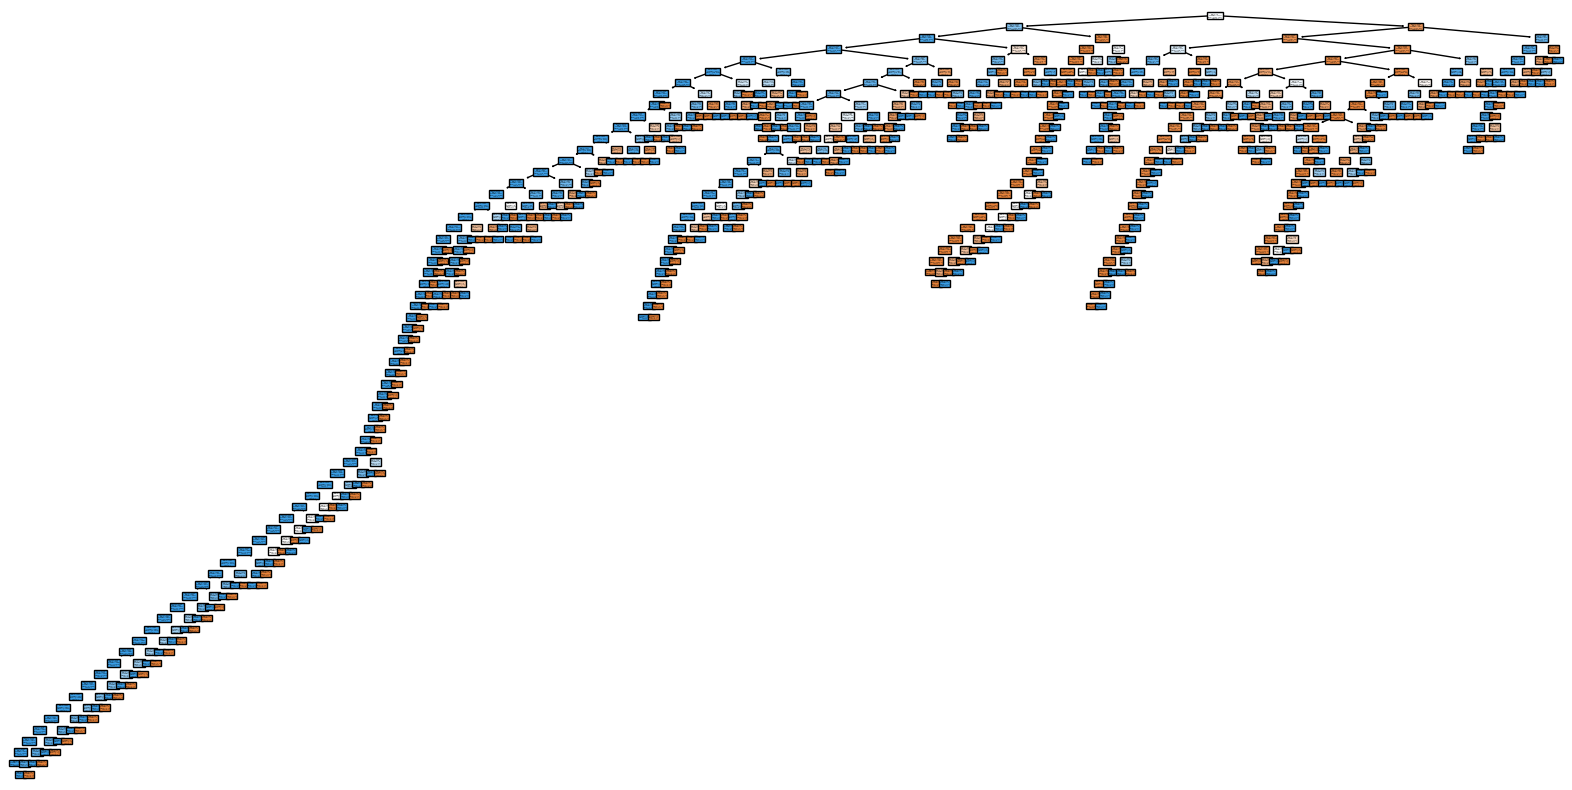

In [7]:
#A4
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
data=pd.read_csv('train_news.csv')
data['headline'].fillna('',inplace=True)
data['written_by'].fillna('',inplace=True)
data['news'].fillna('',inplace=True)
x=data.drop(columns=['label'])
y=data['label']
label_encoder=LabelEncoder()
categorical_cols=['headline','written_by','news']
for col in categorical_cols:
    x[col]=label_encoder.fit_transform(x[col])
tfidf_vectorizer=TfidfVectorizer(max_features=2000)
x_text=tfidf_vectorizer.fit_transform(data['headline']+' '+data['written_by']+' '+ data['news'])
x=pd.concat([x.drop(columns=['headline','written_by','news']),pd.DataFrame(x_text.toarray())],axis=1)
x.columns=x.columns.astype(str)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
train_acc=accuracy_score(y_train,DT.predict(x_train))
print("accuracy of training set is ",train_acc)
test_acc=accuracy_score(y_test,DT.predict(x_test))
print("accuracy of test set is ",test_acc)
feature_names=x.columns.tolist()
class_names=[str(class_name) for class_name in DT.classes_]
plt.figure(figsize=(20,10))
tree.plot_tree(DT,filled=True,feature_names=feature_names,class_names=class_names)
plt.show()

accuracy of training set is  1.0
accuracy of test set is  0.9431089743589743


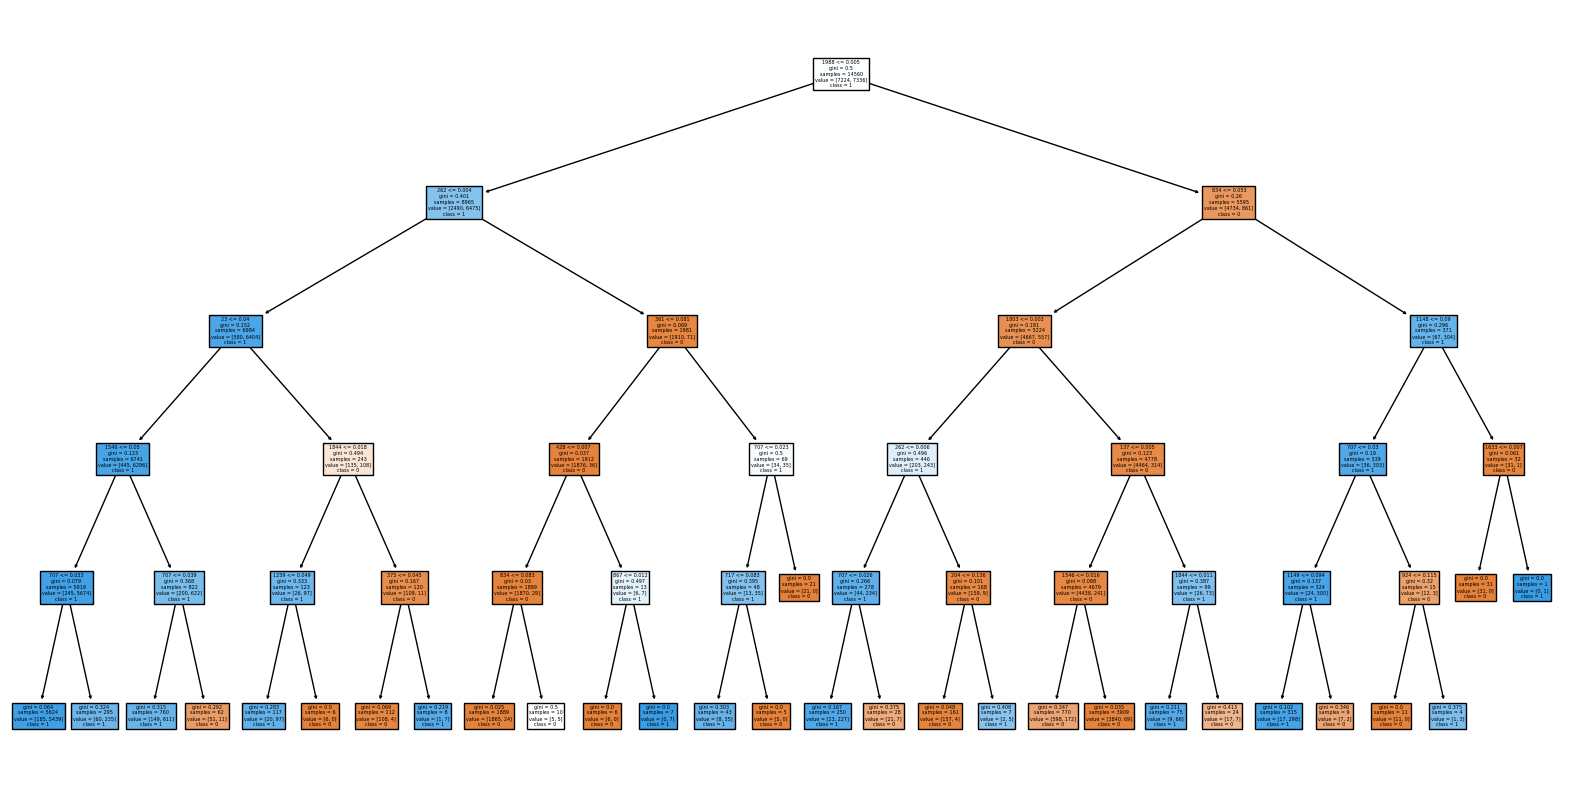

In [9]:
#A5
max_depth=5
DT=DecisionTreeClassifier(max_depth=max_depth)
DT.fit(x_train,y_train)
rain_acc=accuracy_score(y_train,DT.predict(x_train))
print("accuracy of training set is ",train_acc)
test_acc=accuracy_score(y_test,DT.predict(x_test))
print("accuracy of test set is ",test_acc)
feature_names=x.columns.tolist()
class_names=[str(class_name) for class_name in DT.classes_]
plt.figure(figsize=(20,10))
tree.plot_tree(DT,filled=True,feature_names=feature_names,class_names=class_names)
plt.show()

training set accuracy with entropy criteria is  0.9391483516483516
training set accuracy with entropy criteria is  0.9360576923076923


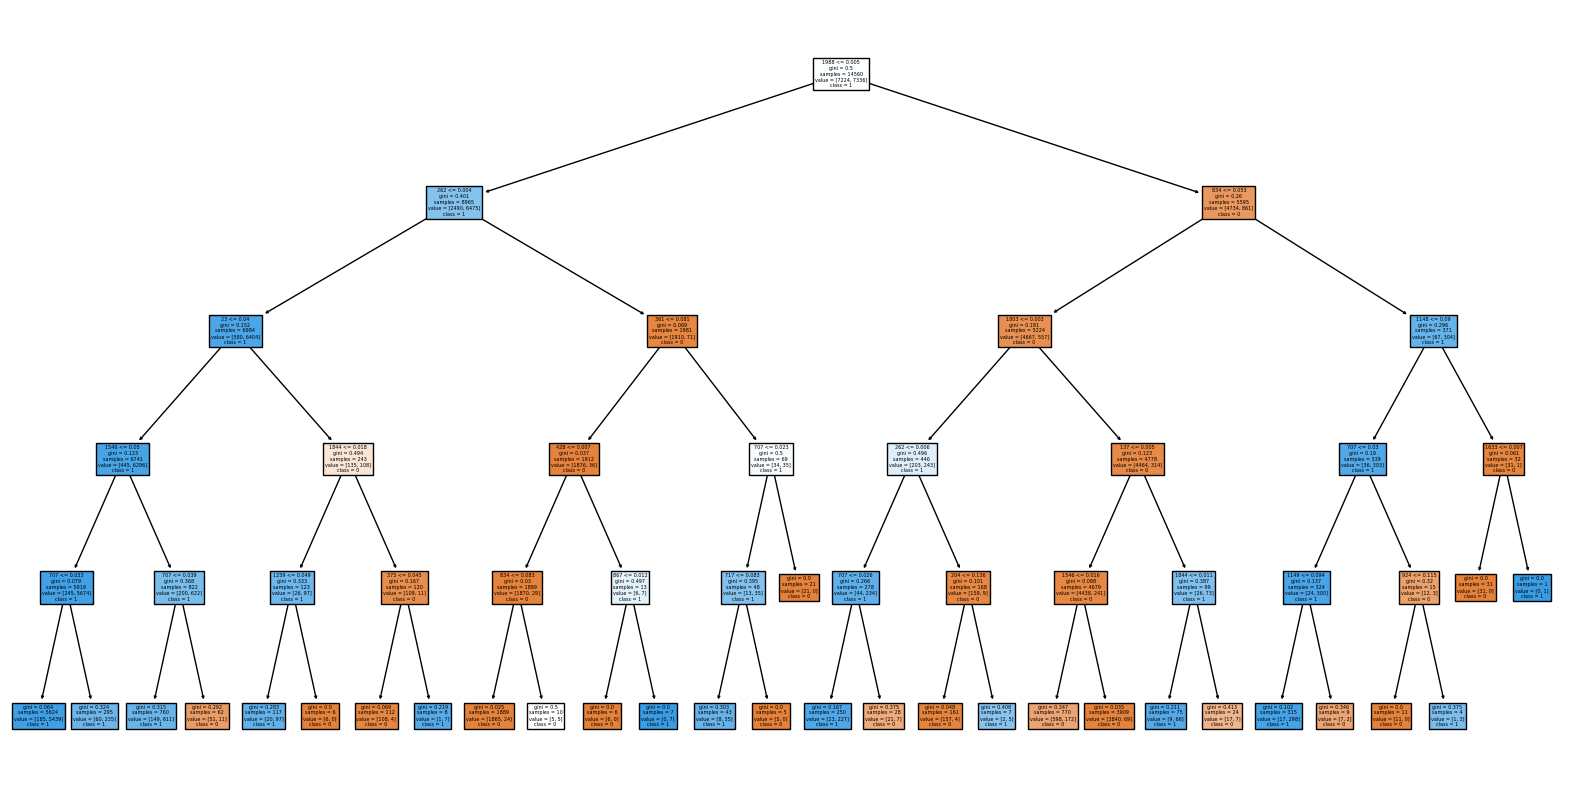

In [11]:
#A6
DT_entropy=DecisionTreeClassifier(criterion="entropy",max_depth=5)
DT_entropy.fit(x_train,y_train)
train_acc_entropy=accuracy_score(y_train,DT_entropy.predict(x_train))
print("training set accuracy with entropy criteria is ",train_acc_entropy)
test_acc_entropy=accuracy_score(y_test,DT_entropy.predict(x_test))
print("training set accuracy with entropy criteria is ",test_acc_entropy)
plt.figure(figsize=(20,10))
tree.plot_tree(DT,filled=True,feature_names=feature_names,class_names=class_names)
plt.show()

In [13]:
#A7
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
data=pd.read_csv('train_news.csv')
data['headline'].fillna('',inplace=True)
data['written_by'].fillna('',inplace=True)
data['news'].fillna('',inplace=True)
x=data.drop(columns=['label'])
y=data['label']
label_encoder=LabelEncoder()
categorical_cols=['headline','written_by','news']
for col in categorical_cols:
    x[col]=label_encoder.fit_transform(x[col])
tfidf_vectorizer=TfidfVectorizer(max_features=2000)
x_text=tfidf_vectorizer.fit_transform(data['headline']+' '+data['written_by']+' '+ data['news'])
x=pd.concat([x.drop(columns=['headline','written_by','news']),pd.DataFrame(x_text.toarray())],axis=1)
x.columns=x.columns.astype(str)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)
RF_classifier=RandomForestClassifier(n_estimators=200,random_state=50)
RF_classifier.fit(x_train,y_train)
y_pred=RF_classifier.predict(x_test)
train_acc=accuracy_score(y_train,RF_classifier.predict(x_train))
print("accuracy of training set is ",train_acc)
test_acc=accuracy_score(y_test,y_pred)
print("accuracy of test set is ",test_acc)
feature=RF_classifier.feature
print(feature)

accuracy of training set is  1.0
accuracy of test set is  0.9705128205128205


AttributeError: 'RandomForestClassifier' object has no attribute 'feature'